In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [92]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np

kmeans = KMeans(n_clusters=150, random_state=42, n_init="auto")
kmeans.fit(X_train_pca)

KMeans(n_clusters=150, random_state=42)

In [93]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_pca, kmeans.labels_)

0.1993432

In [94]:
kmeans.inertia_

1904.355224609375

In [95]:
kmeans.score(X_train_pca)

-1904.3551025390625

In [96]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=5, random_state=42)

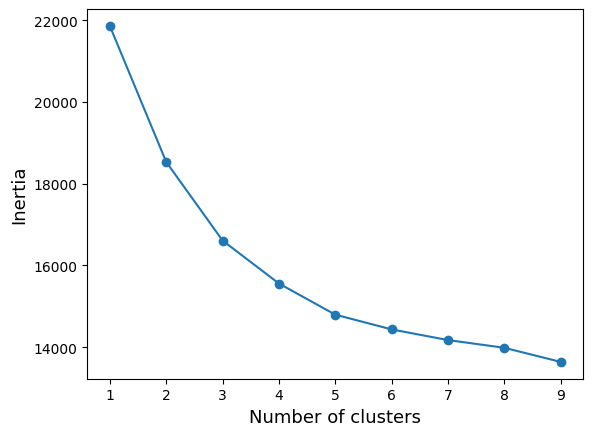

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_arr = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state= 21, n_init="auto")
    kmeans.fit(X_train_pca)
    inertia = kmeans.inertia_
    inertia_arr.append(inertia)

# Elobw Method 그래프 그리기
plt.plot(k_range, inertia_arr, marker= 'o')
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

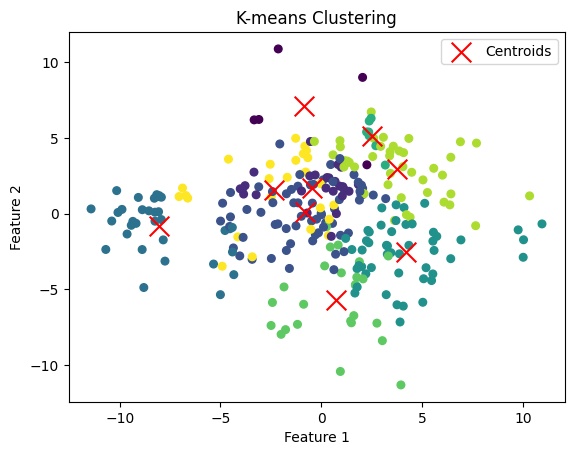

In [100]:
from sklearn.cluster import KMeans

kmeans_labels = kmeans.fit_predict(X_train_pca)

# 클러스터링 결과 시각화
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


kmeans 군집을 클러스터링하여서 centroids을 기준으로 시각화를 진행해보았는데, 잘 정돈되어 있지 않다고 생각하였습니다.